<a href="https://colab.research.google.com/github/b4lbs/alura_ML_lidando_com_dados_de_muitas_dimensoes/blob/main/ML_lidando_com_dados_de_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregando dados
import pandas as pd

resultados_exames = pd.read_csv("/content/exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
#Observando a quantidade de células vazias em cada coluna
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Devida a alta ocorrência de valores vazios na coluna exame_33, optamos por dropar a coluna inteira, ao invés de pensar em outras possibilidades, como inserir os valores faltantes (inviável nesse caso).

In [ ]:
#Separação dos dados depois do primeiro tratamento do DataFrame
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns = ['exame_33'])
X_train, X_test, y_train, y_test = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

In [ ]:
X_train.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
149,13.74,17.91,88.12,103.78,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.786,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,103.78,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,...,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.786,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,103.78,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.786,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,103.78,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.786,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,103.78,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,...,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.786,0.07174,0.2642,0.06953


In [ ]:
y_train.head()

149    B
124    B
421    B
195    B
545    B
Name: diagnostico, dtype: object

In [ ]:
#Testando o algoritmo Random Forest Classifier usando os dados alterados pela primeira vez
from sklearn.ensemble import RandomForestClassifier

SEED = 42
random.seed(SEED)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
resultado = classifier.score(X_test, y_test)
print(f'Resultado da classificação Random Forest {resultado*100:.2f}%')


Resultado da classificação Random Forest 97.08%


O código abaixo será utilizado para ter ideia de uma baseline inicial (comparar com o primeiro modelo que utilizamos). Após verificar que o modelo de Random Forest foi mais efeito, descartamos a baseline do DummyClassifier e utilizamos como baseline o resultado do RandomForest.

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 42
random.seed(SEED)

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
resultado = dummy_classifier.score(X_test, y_test)
print(f'Resultado da classificação dummy {resultado*100:.2f}%')


Resultado da classificação dummy 63.16%


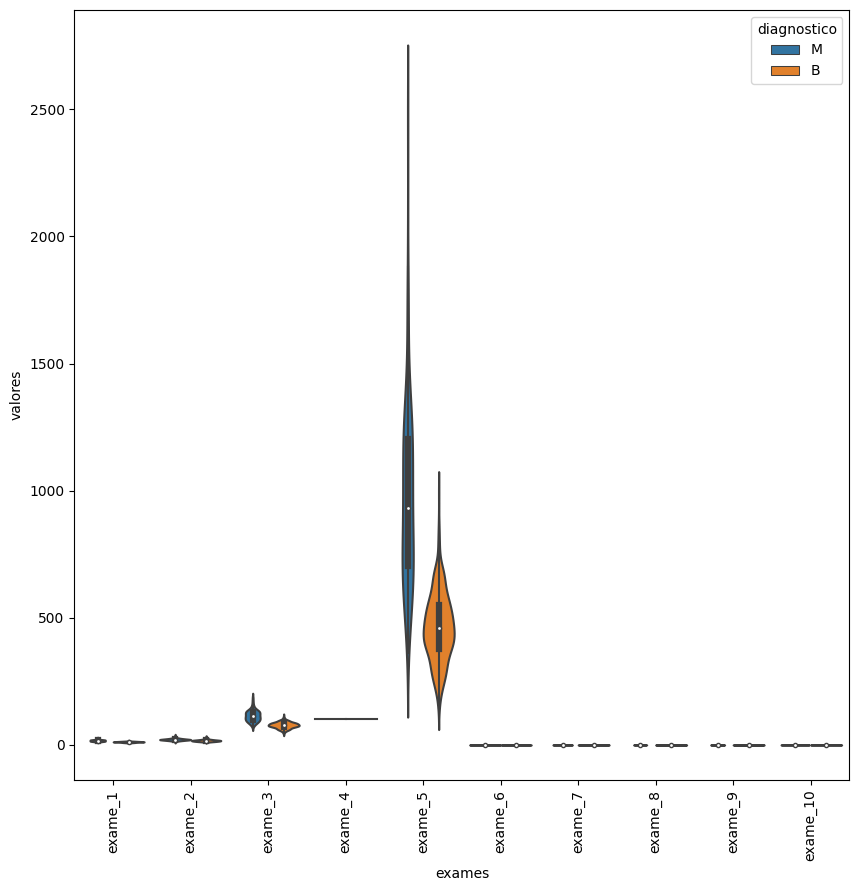

In [ ]:
#Observação inicial (problemas de visualização - escalas muito diferentes)
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores',
               hue = 'diagnostico',
               data = dados_plot)
plt.xticks(rotation = 90)
plt.show()

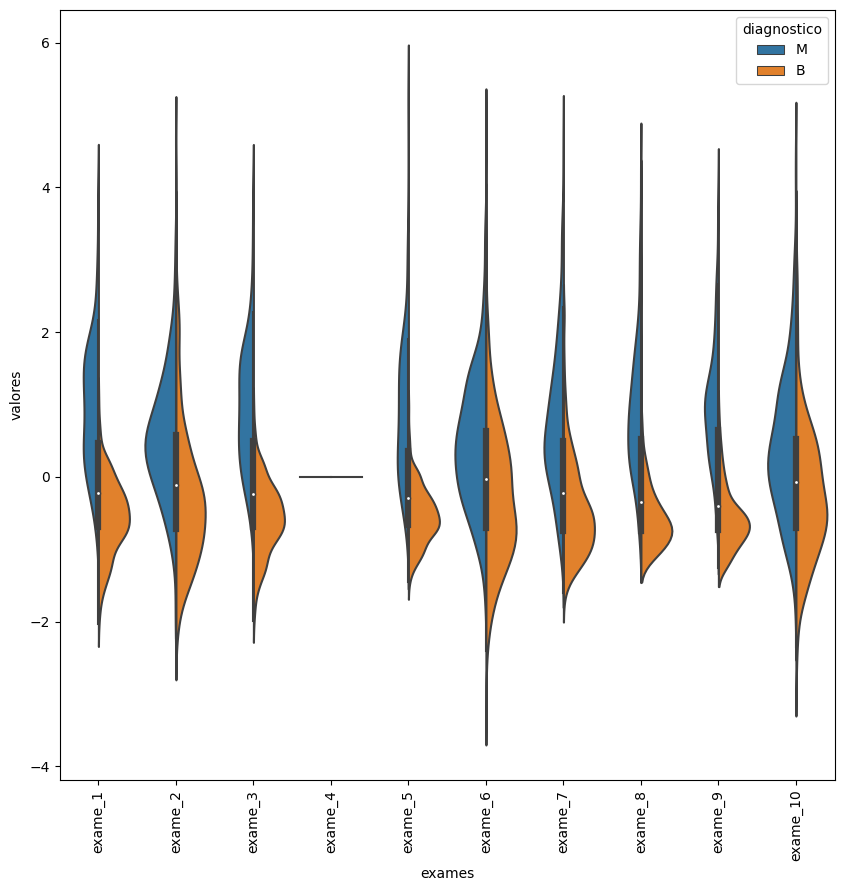

In [ ]:
#Visualizando os dados escalonados
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Escalonando os dados para melhorar a visualização
scaler = StandardScaler()
scaler.fit(valores_exames_v1)
valores_exames_v2 = scaler.transform(valores_exames_v1) #retorna um array numpy

#Transformando em um DataFrame
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                 columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')

plt.figure(figsize = (10,10))
sns.violinplot(x = 'exames', y = 'valores',
               hue = 'diagnostico',
               data = dados_plot,
               split = True)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Função para plotar o gráfico
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                       var_name = 'exames',
                       value_name = 'valores')

  plt.figure(figsize = (10,10))
  sns.violinplot(x = 'exames', y = 'valores',
               hue = 'diagnostico',
               data = dados_plot,
               split = True)
  plt.xticks(rotation = 90)
  plt.show()

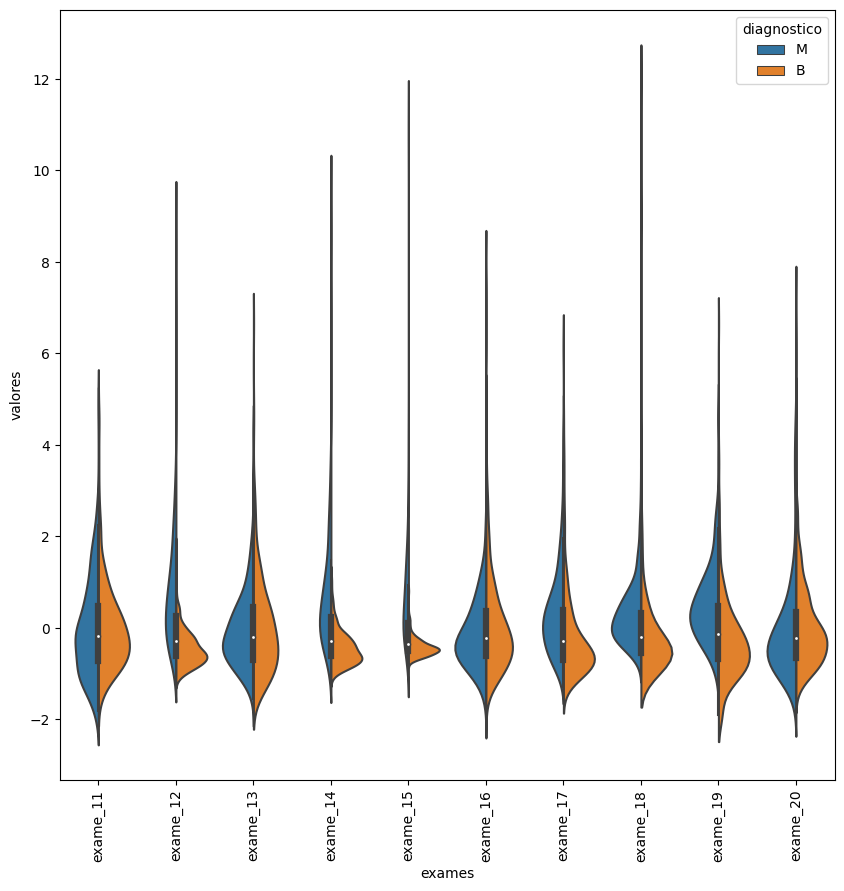

In [ ]:
grafico_violino(valores_exames_v2, 10, 20)

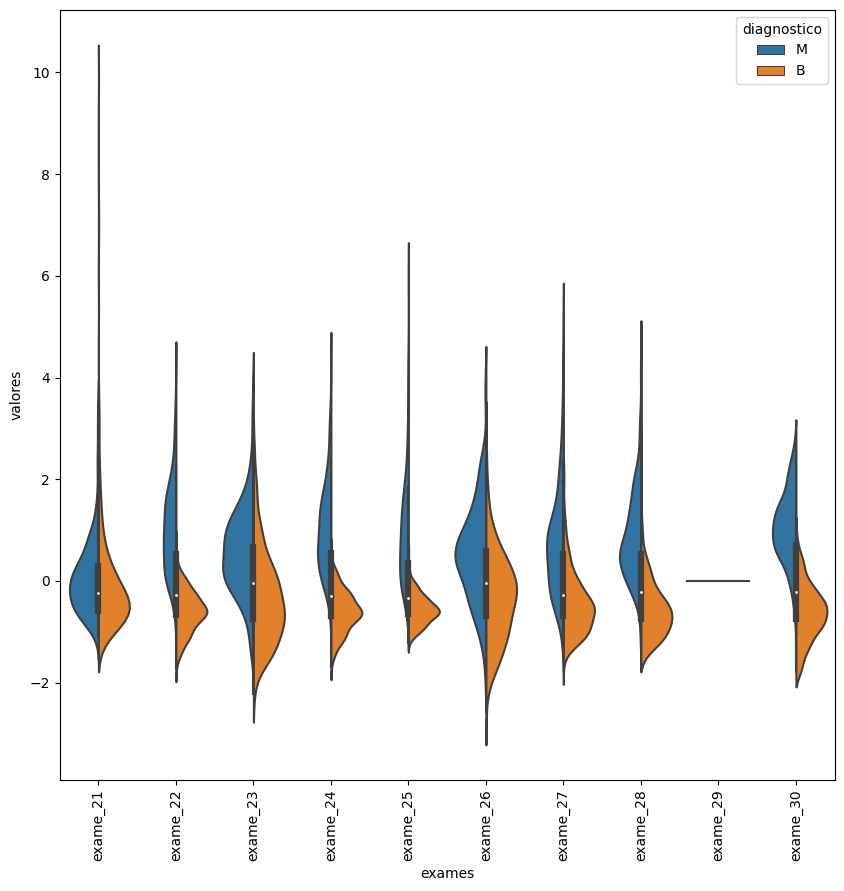

In [ ]:
grafico_violino(valores_exames_v2, 20, 30)

In [ ]:
#Dropando as colunas que possuem valores constantes, ou seja, não agregam em nada
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_4', 'exame_29'])

In [ ]:
#Função para treinar e testar o algoritmo
def classificar(valores):
  SEED = 42
  random.seed(SEED)
  X_train, X_test, y_train, y_test = train_test_split(valores,
                                                    diagnostico,
                                                    test_size = 0.3)
  classifier = RandomForestClassifier()
  classifier.fit(X_train, y_train)
  resultado = classifier.score(X_test, y_test)
  print(f'Resultado da classificação Random Forest {resultado*100:.2f}%')

In [ ]:
#Testando o algoritmo no DataFrame com a terceira alteração (escalonado e sem as colunas que possuem valores constantes ou vazios)
classificar(valores_exames_v3)

Resultado da classificação Random Forest 96.49%


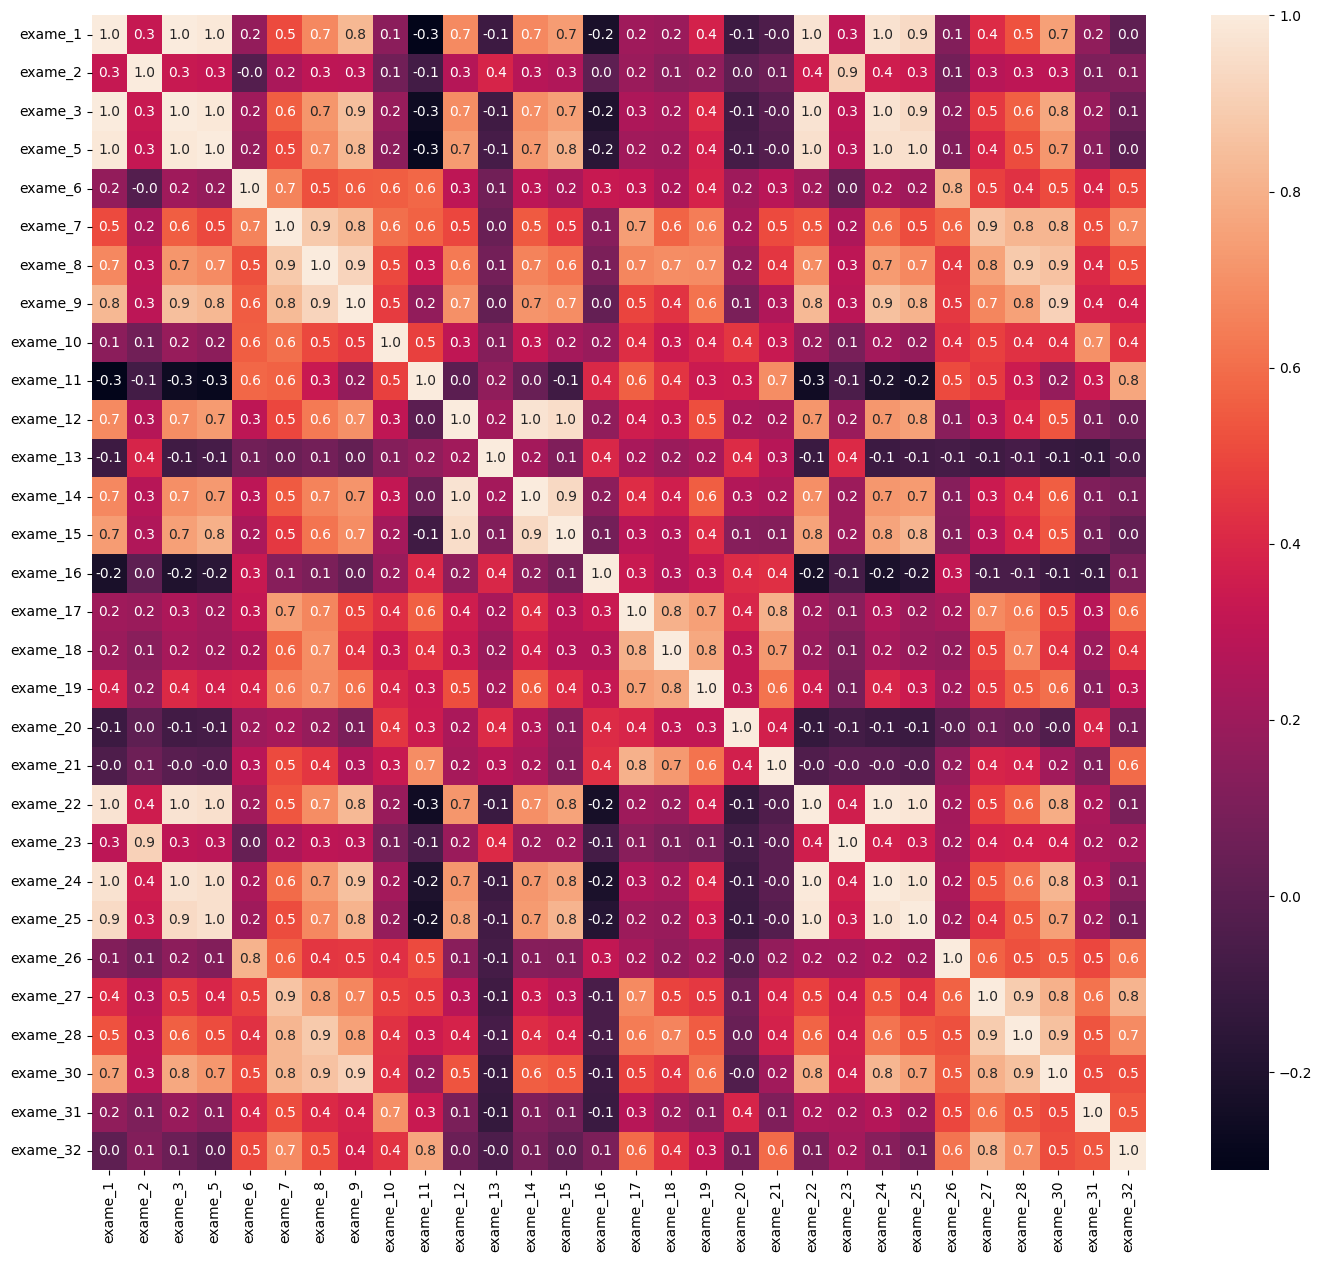

In [ ]:
#Matriz de Correlação
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')
plt.show()

In [ ]:
matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
#Observando que essas variáveis são altamente correlacionadas
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns = variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar(valores_exames_v4)

Resultado da classificação Random Forest 96.49%


Poderia ter ocorrido uma diminuição na porcentagem a cima, pois foram excluidas todas as colunas correlacionadas, ao invés de metade delas.
Porcentagem igual aos valores_v3, porém menor que os valores_v1.

In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])

In [ ]:
#Testando no DataFrame sem metade das colunas que possuem altos valores relacionais
classificar(valores_exames_v5)

Resultado da classificação Random Forest 97.08%


Teve porcentagem maior que os valores_v4 mas tem porcentagem igual aos valores_v1.

CORRELAÇÃO NÃO NECESSARIAMENTE TEM HAVER COM CAUSALIDADES. O EXAME_1 ESTAR ALTO NÃO É CAUSA DO EXAME_3 TAMBÉM ESTAR ALTO E VICE-VERSA.

In [ ]:
#Método automático de seleção das K melhores features baseada em performance de uma função
from sklearn.feature_selection import SelectKBest, chi2

SEED = 42
random.seed(SEED)

#chi2 é a função que calculará um score para cada feature do DataFrame
#a função não aceita valores negativos, então é necessário passar dados não escalonados
select_kbest = SelectKBest(chi2, k=10)

valores_exames_v6 = valores_exames_v1.drop(columns = ['exame_3', 'exame_4', 'exame_24', 'exame_29'])

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size = 0.3)

select_kbest.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x79bc140ce9e0>)

In [ ]:
kbest_train = select_kbest.transform(X_train)
kbest_test = select_kbest.transform(X_test)

In [ ]:
kbest_test.shape

(171, 10)

In [ ]:
random_classifier = RandomForestClassifier(random_state = 42)
random_classifier.fit(kbest_train, y_train)
resultado = random_classifier.score(kbest_test, y_test)
print(f'Resultado da classificação Random Forest {resultado*100:.2f}%')

Resultado da classificação Random Forest 98.25%


In [ ]:
from sklearn.metrics import confusion_matrix

pred = random_classifier.predict(kbest_test)
matriz_confusao =  confusion_matrix(y_test, pred)
matriz_confusao

array([[107,   1],
       [  2,  61]])

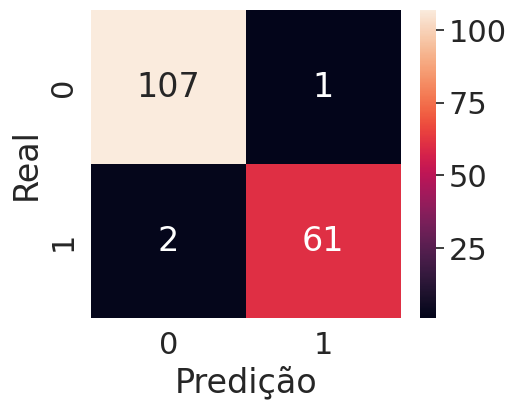

In [ ]:
plt.figure(figsize = (5,4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()

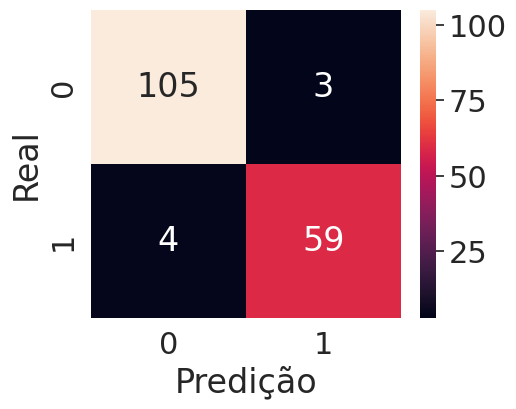

In [ ]:
#Método automático de seleção das K melhores features com base na eliminação recursiva das feautures
from sklearn.feature_selection import RFE

SEED = 42
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size = 0.3)

select_rfe = RFE(estimator = random_classifier, n_features_to_select = 10, step = 1)
select_rfe.fit(X_train, y_train)
rfe_train = select_rfe.transform(X_train)
rfe_test = select_rfe.transform(X_test)
random_classifier.fit(rfe_train, y_train)

matriz_confusao = confusion_matrix(y_test, random_classifier.predict(rfe_test))
plt.figure(figsize = (5,4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()

In [ ]:
resultado = random_classifier.score(rfe_test, y_test)
print(f'Resultado da classificação Random Forest {resultado*100:.2f}%')

Resultado da classificação Random Forest 95.91%


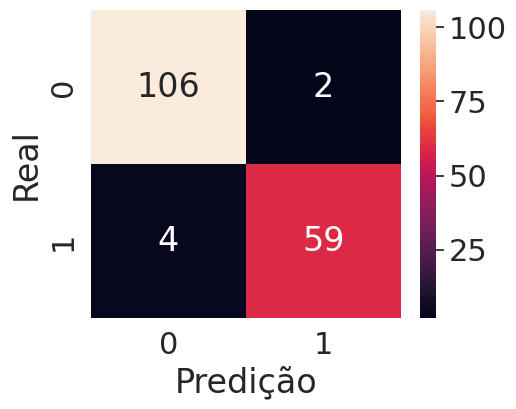

In [ ]:
#RFE CROSS VALIDATION
from sklearn.feature_selection import RFECV

SEED = 42
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size = 0.3)

select_rfecv = RFECV(estimator = random_classifier, cv = 12, step = 1, scoring = 'accuracy')
select_rfecv.fit(X_train, y_train)
rfecv_train = select_rfecv.transform(X_train)
rfecv_test = select_rfecv.transform(X_test)
random_classifier.fit(rfecv_train, y_train)

matriz_confusao = confusion_matrix(y_test, random_classifier.predict(rfecv_test))
plt.figure(figsize = (5,4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()

In [ ]:
resultado = random_classifier.score(rfecv_test, y_test)
print(f'Resultado da classificação Random Forest {resultado*100:.2f}%')

Resultado da classificação Random Forest 96.49%


In [ ]:
#Número de features selecionadas
select_rfecv.n_features_

12

In [ ]:
#Quais features foram selecionadas
X_train.columns[select_rfecv.support_]


Index(['exame_1', 'exame_5', 'exame_8', 'exame_9', 'exame_15', 'exame_22',
       'exame_23', 'exame_25', 'exame_27', 'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

In [ ]:
select_rfecv.cv_results_['mean_test_score']

array([0.85160428, 0.92453951, 0.93211527, 0.93969103, 0.94474153,
       0.94734106, 0.94734106, 0.95476827, 0.95231729, 0.94971777,
       0.95231729, 0.96234403, 0.95989305, 0.9573678 , 0.96234403,
       0.96234403, 0.96226976, 0.95476827, 0.95484254, 0.96226976,
       0.96234403, 0.95484254, 0.95484254, 0.95484254, 0.95981878,
       0.95729352, 0.94734106, 0.95231729])

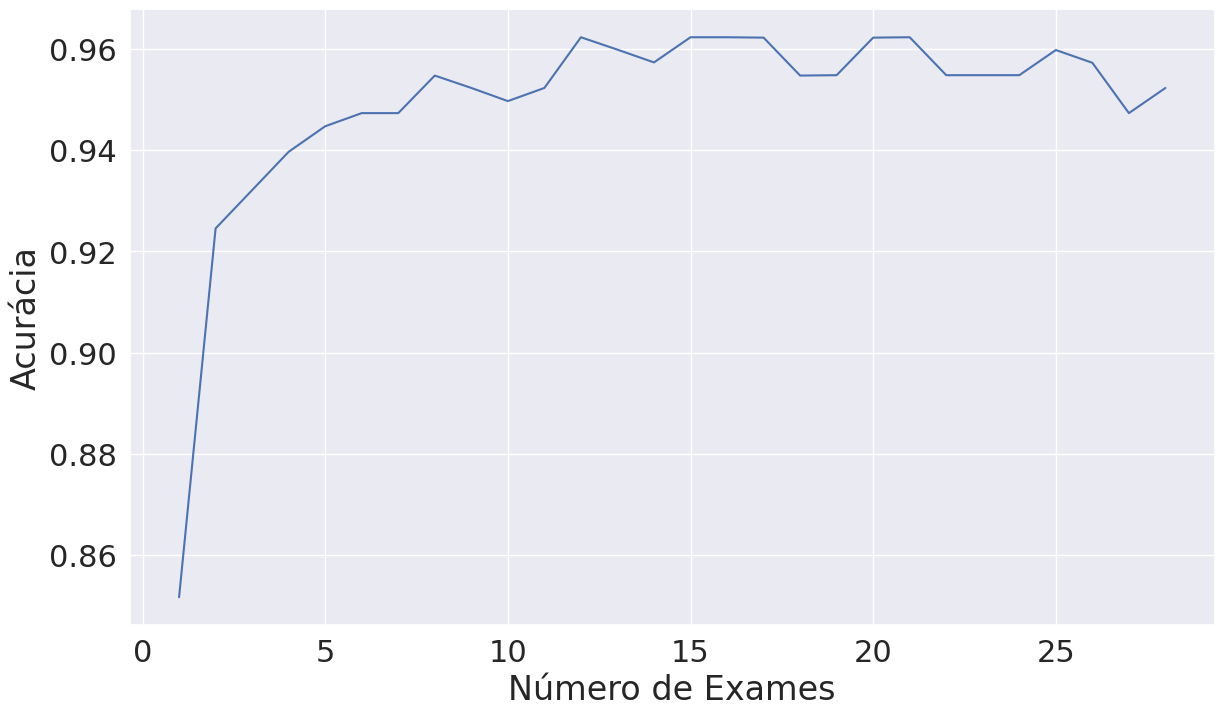

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(select_rfecv.cv_results_['mean_test_score'])+1), select_rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
#Criando um RFE para escolher apenas 2 dimensões
SEED = 42
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size = 0.3)

select_rfe = RFE(estimator = random_classifier, n_features_to_select = 2, step = 1)
select_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=2)

In [ ]:
valores_exames_v7 = select_rfe.transform(valores_exames_v6)

In [ ]:
#Array de duas dimensões para poder plotar um gráfico de dispersão
valores_exames_v7.shape

(569, 2)

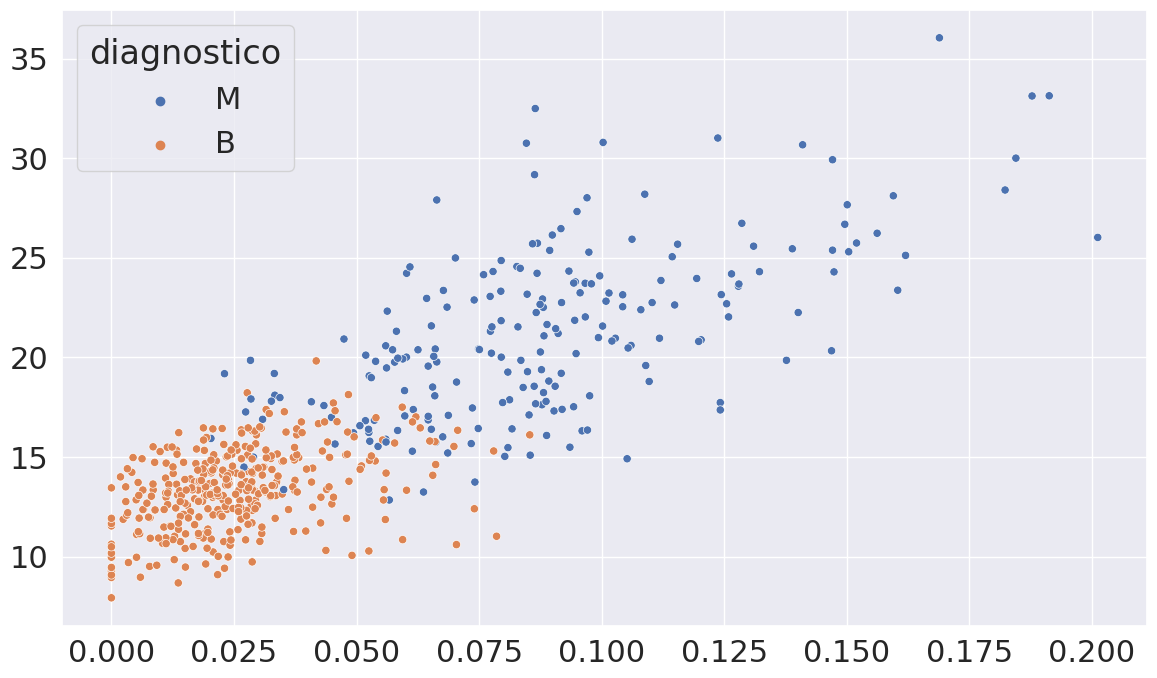

In [ ]:
#Limitar-se a duas dimensões faz com que haja a perda de muita informação
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)
plt.show()

In [ ]:
#Reduzindo os dados em duas dimensões sem muita perda de informação
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
#Transformando em cima dos dados escalonados
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [ ]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

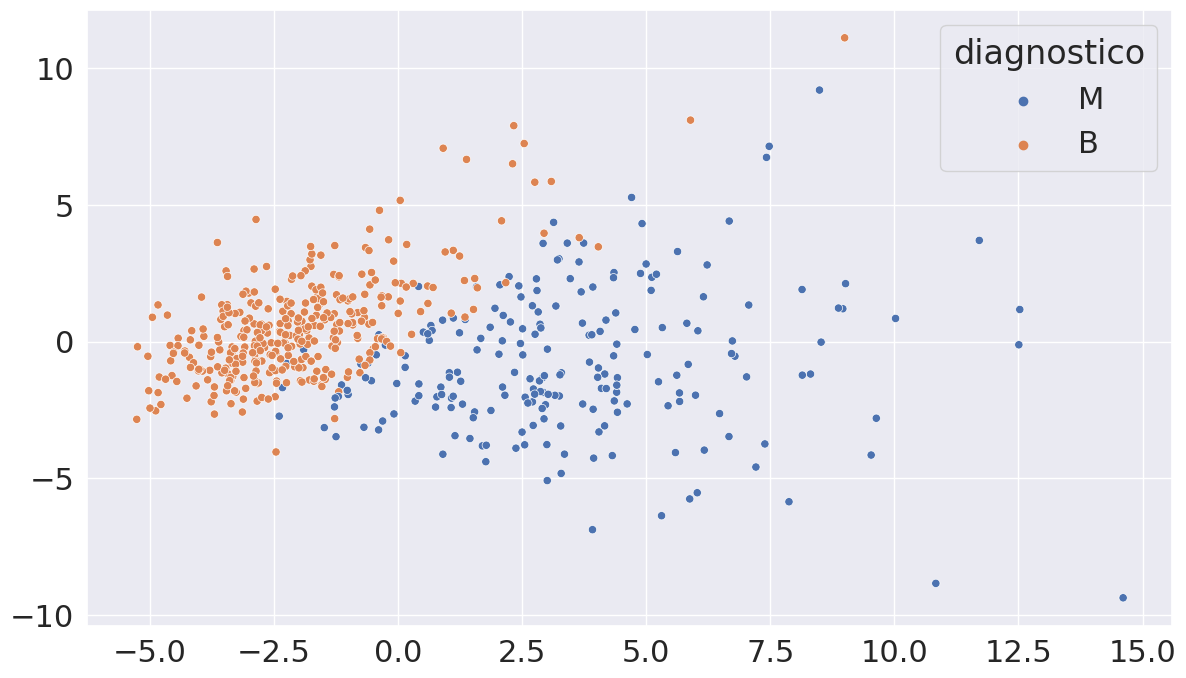

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)
plt.show()

In [ ]:
#Reduzindo os dados em duas dimensões porém mantendo a disntância entre os pontos
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
#Transformando em cima dos dados escalonados
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

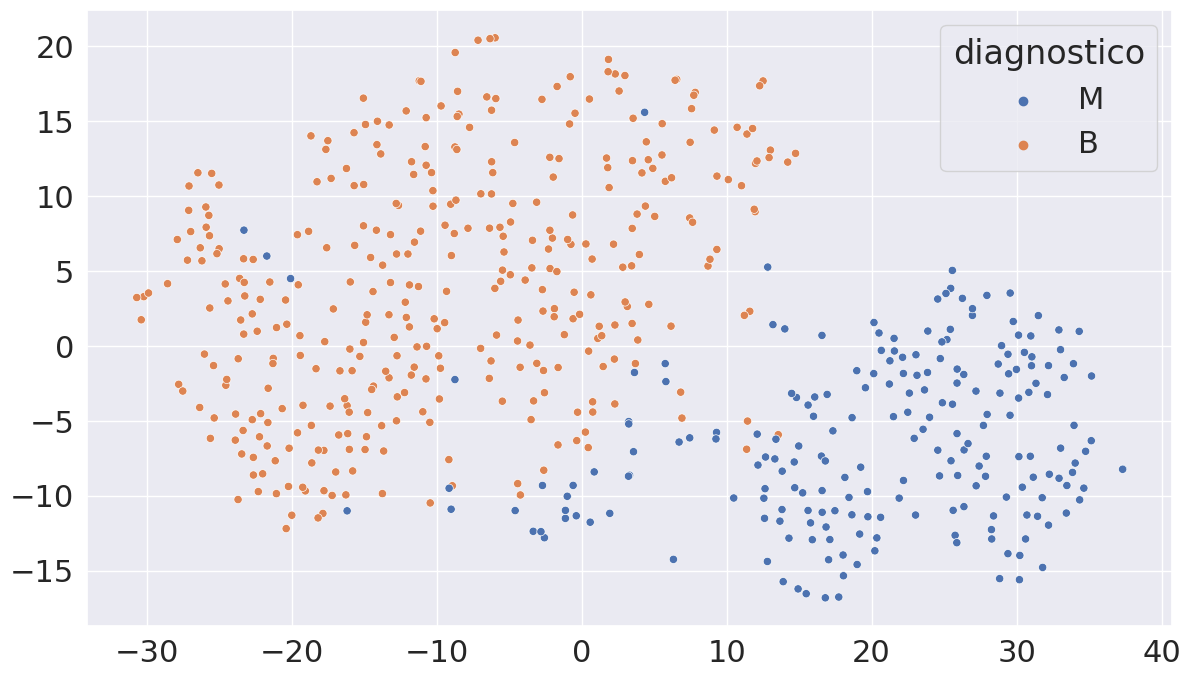

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)
plt.show()